In [1]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from torchvision import transforms
from PIL import Image
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import io
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


dataset = pd.read_pickle("/content/tops_7000_filtered.pkl")
print(f"Loaded {len(dataset)} samples.")



Using device: cuda
Loaded 7000 samples.


In [2]:

print("Unique categories in category1:")
print(dataset['category1'].unique())
categories_of_interest = ['tops']
category_labels = {
    'dresses': 0,
    'jackets': 1,
    'pants': 2,
    'skirts': 3,
    'tops': 4
}
label_table = pd.DataFrame(list(category_labels.items()), columns=["Category", "Label"])
print("\nCategory Label Mapping Table:")
print(label_table)
def clean_category(cat):
    if isinstance(cat, str):
        cat = cat.strip().lower()
        if "top" in cat or "shirt" in cat or "blouse" in cat:
            return "tops"
    return None

dataset['category1_cleaned'] =dataset['category1'].apply(clean_category)
filtered_df = dataset[dataset['category1_cleaned'].isin(categories_of_interest)].copy()
filtered_df = filtered_df.dropna(subset=['category1_cleaned'])



print("Assigning numerical labels...")
filtered_df['category_label'] = filtered_df['category1_cleaned'].map(category_labels)
print(filtered_df[['category1_cleaned', 'category_label']].head())
print(f"Number of Samples: {len(filtered_df)}")

print("Creating train/test split...")
train_df, test_df = train_test_split(
    filtered_df, test_size=0.2, random_state=42, stratify=filtered_df['category_label'])

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

print("Preprocessing data...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
filtered_df.to_pickle("tops_7000_filtered.pkl")
print("Filtered dataset saved to 'tops_7000_filtered.pkl'")


Unique categories in category1:
['tops']

Category Label Mapping Table:
  Category  Label
0  dresses      0
1  jackets      1
2    pants      2
3   skirts      3
4     tops      4
Assigning numerical labels...
  category1_cleaned  category_label
0              tops               4
1              tops               4
2              tops               4
3              tops               4
4              tops               4
Number of Samples: 7000
Creating train/test split...
Training set size: 5600
Testing set size: 1400
Preprocessing data...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Filtered dataset saved to 'tops_7000_filtered.pkl'


Converting DataFrames and preprocessing...
TRAINED
Tested


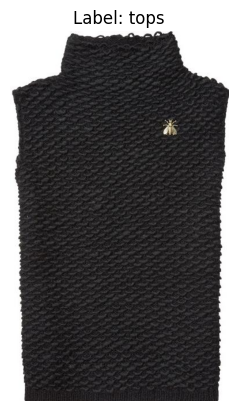

Description: black v-neck sweater with a honeycomb knit pattern. the sweater has a round neckline and is made of a soft, knit material. it is a close-fitting garment that is suitable for colder weather.
done



Sample Shapes and Sizes:
Images shape: torch.Size([5600, 3, 224, 224])
Input IDs shape: torch.Size([5600, 137])
Attention Mask shape: torch.Size([5600, 137])
Labels shape: torch.Size([5600])
Number of Training samples: 5600
Number of Testing samples: 1400

Visualizing processed data (sample):


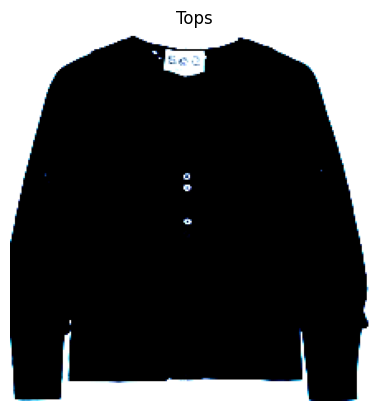

Text (Tokenized): [CLS] green and black blouse with a lace collar and a floral pattern. the blouse has long sleeves and a high neckline. the fabric is a mix of cotton and silk, and the style is a mix of bohemian and classic. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [3]:

def preprocess_data(examples):
    images = [transform(Image.open(io.BytesIO(ex['image']['bytes'])).convert("RGB"))
              if 'image' in ex and 'bytes' in ex['image']
              else torch.zeros(3, 224, 224)
              for ex in examples]

    texts = [ex['text'] for ex in examples]
    tokenized_texts = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    labels = torch.tensor([ex['category_label'] for ex in examples])

    return {
        'images': torch.stack(images),
        'input_ids': tokenized_texts['input_ids'],
        'attention_mask': tokenized_texts['attention_mask'],
        'labels': labels
    }
print("Converting DataFrames and preprocessing...")
train_data = train_df.to_dict('records')
print("TRAINED")
test_data = test_df.to_dict('records')
print("Tested")

sample = filtered_df.iloc[0]
img = Image.open(io.BytesIO(sample['image']['bytes'])).convert("RGB")

plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {sample['category1']}")
plt.show()

print("Description:", sample['text'])

preprocessed_train = preprocess_data(train_data)
print("done")
preprocessed_test = preprocess_data(test_data)

print("\nSample Shapes and Sizes:")
print("Images shape:", preprocessed_train['images'].shape)
print("Input IDs shape:", preprocessed_train['input_ids'].shape)
print("Attention Mask shape:", preprocessed_train['attention_mask'].shape)
print("Labels shape:", preprocessed_train['labels'].shape)

print(f"Number of Training samples: {len(preprocessed_train['labels'])}")
print(f"Number of Testing samples: {len(preprocessed_test['labels'])}")

print("\nVisualizing processed data (sample):")
def show_sample(index):
    plt.imshow(preprocessed_train['images'][index].permute(1, 2, 0))
    label_idx = int(preprocessed_train['labels'][index])
    plt.title(f"Tops")
    plt.axis('off')
    plt.show()
    print("Text (Tokenized):", tokenizer.decode(preprocessed_train['input_ids'][index]))

show_sample(0)




In [4]:
class SmallVAE(nn.Module):
    def __init__(self, latent_dim=64):
        super(SmallVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(16, 32, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), nn.ReLU(),
            nn.Flatten()
        )
        self.flatten_dim = 64 * 28 * 28
        self.fc_mu = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.flatten_dim, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, self.flatten_dim)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (64, 28, 28)),
            nn.ConvTranspose2d(64, 32, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 4, 2, 1), nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_encoded = self.encoder(x)
        mu = self.fc_mu(x_encoded)
        logvar = self.fc_logvar(x_encoded)
        z = self.reparameterize(mu, logvar)
        decoded = self.decoder(self.fc_decode(z))
        return decoded, mu, logvar


In [5]:
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div


In [6]:
def train_vae(model, data, epochs=10, batch_size=64, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)
    losses = []

    images = data['images']
    dataset = torch.utils.data.TensorDataset(images)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for batch in dataloader:
            batch = batch[0].to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(batch)
            loss = vae_loss(recon_batch, batch, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader.dataset)
        losses.append(avg_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.2f}")
    return losses


Using device: cuda
Epoch 1/10, Loss: 255721.00
Epoch 2/10, Loss: 206157.84
Epoch 3/10, Loss: 196170.27
Epoch 4/10, Loss: 192258.80
Epoch 5/10, Loss: 189557.30
Epoch 6/10, Loss: 187665.93
Epoch 7/10, Loss: 186057.70
Epoch 8/10, Loss: 182878.52
Epoch 9/10, Loss: 181524.90
Epoch 10/10, Loss: 180101.04


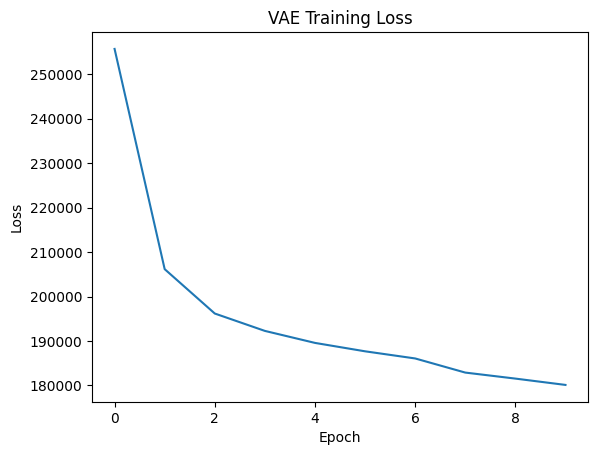

In [7]:
preprocessed_train['images'] = preprocessed_train['images'].to(device)
preprocessed_test['images'] = preprocessed_test['images'].to(device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

preprocessed_train['images'] = preprocessed_train['images'].to(device)
preprocessed_test['images'] = preprocessed_test['images'].to(device)

vae = SmallVAE(latent_dim=64)
losses = train_vae(vae, preprocessed_train, epochs=10, batch_size=64)

plt.plot(losses)
plt.title("VAE Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [12]:

vae = SmallVAE(latent_dim=64)
vae.load_state_dict(torch.load("/content/vae_trained.pth", map_location="cuda" if torch.cuda.is_available() else "cpu"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)
print(f"Model loaded on: {device}")
def encode_latents(model, images, batch_size=256):
    model.eval()
    all_latents = []
    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size].to(device)
            _, mu, _ = model(batch)
    return mu
def find_most_similar(query_img, dataset_imgs, model):
    model.eval()
    with torch.no_grad():
        query_img = query_img.unsqueeze(0).to(device)
        query_latent = encode_latents(model, query_img)
        dataset_latents = encode_latents(model, preprocessed_train['images'])

        sims = F.cosine_similarity(query_latent, dataset_latents)
        top_idx = torch.argmax(sims).item()
    return top_idx, sims[top_idx].item()



Model loaded on: cuda


In [13]:

import random

def visualize_top1_similarity(model, test_images, test_labels, train_images, train_labels, num_examples=5):
    model.eval()
    model = model.to(device)

    indices = random.sample(range(len(test_images)), num_examples)

    with torch.no_grad():
        for i in indices:
            query_img = test_images[i].unsqueeze(0).to(device)
            query_label = test_labels[i].item()
            _, query_mu, _ = model(query_img)

            similarities = []
            for j in range(0, len(train_images), 256):
                batch = train_images[j:j+256].to(device)
                batch_labels = train_labels[j:j+256]
                _, batch_mu, _ = model(batch)
                sims = F.cosine_similarity(query_mu, batch_mu)
                similarities.extend(zip(sims.tolist(), batch_labels.tolist(), range(j, j+len(batch))))

            # Sort and get most similar
            most_similar = sorted(similarities, key=lambda x: x[0], reverse=True)[0]
            sim_score, matched_label, matched_index = most_similar

            # Plot query and top-1 match
            plt.figure(figsize=(8, 4))

            plt.subplot(1, 2, 1)
            plt.imshow(test_images[i].cpu().permute(1, 2, 0))
            plt.title(f"Query (Label: {query_label})")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(train_images[matched_index].cpu().permute(1, 2, 0))
            plt.title(f"Match (Label: {matched_label})\nSimilarity: {sim_score:.2f}")
            plt.axis('off')

            plt.show()




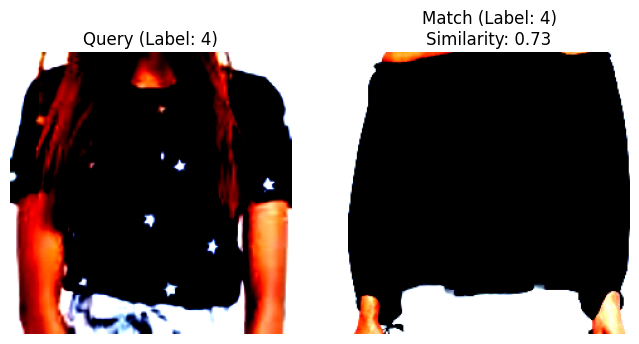

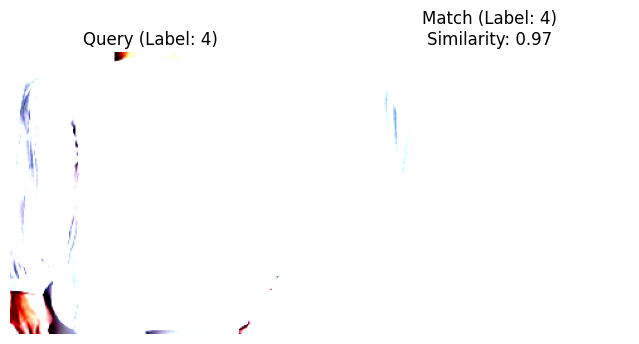

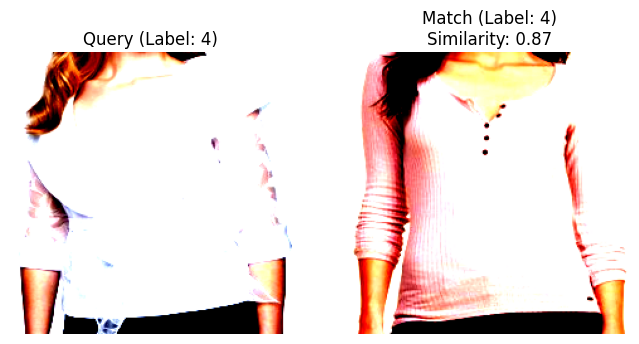

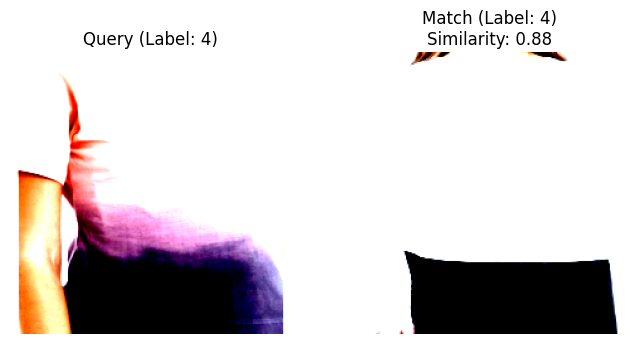

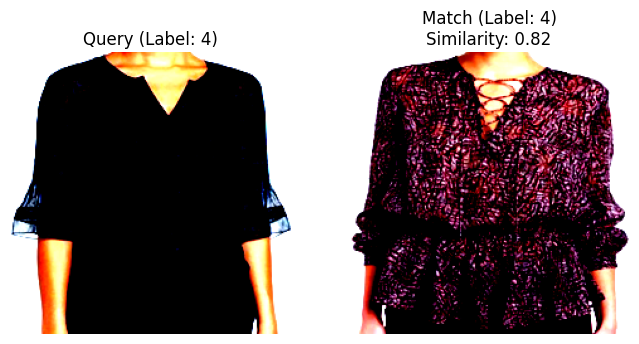

In [14]:
visualize_top1_similarity(
    model=vae,
    test_images=preprocessed_test['images'],
    test_labels=preprocessed_test['labels'],
    train_images=preprocessed_train['images'],
    train_labels=preprocessed_train['labels'],
    num_examples=5
)
